# Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

In [1]:
import pandas as pd

In [2]:
films = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
all_info = films.merge(ratings, on=['movieId'], how = 'right')[['title', 'rating']].groupby('title').mean().reset_index()

In [3]:
# Функция для классификации фильмов на основании среднего всех оценок

def sort_films(data):
    low_rating = data.loc[data.rating <= 2]
    average_rating = data.loc[(2 < data.rating) & (data.rating <= 4)]
    high_rating = data.loc[data.rating > 4]
    
    return low_rating, average_rating, high_rating

In [4]:
low_rating, average_rating, high_rating = sort_films(all_info)

print(f'Фильмов с низким рейтингом: {len(low_rating)}')
print(low_rating.head())
print('----------------------------------------------------')
print(f'Фильмов со средним рейтингом: {len(average_rating)}')
print(average_rating.head())
print('----------------------------------------------------')
print(f'Фильмов с высоким рейтингом: {len(high_rating)}')
print(high_rating.head())

Фильмов с низким рейтингом: 973
                                      title  rating
0          "Great Performances" Cats (1998)    1.75
2   'Hellboy': The Seeds of Creation (2004)    2.00
3           'Neath the Arizona Skies (1934)    0.50
11                  ...And God Spoke (1993)    1.00
20                         10,000 BC (2008)    1.50
----------------------------------------------------
Фильмов со средним рейтингом: 6819
                       title    rating
1               $9.99 (2008)  3.833333
4     'Round Midnight (1986)  2.250000
5        'Salem's Lot (2004)  3.500000
6  'Til There Was You (1997)  2.625000
7         'burbs, The (1989)  3.052632
----------------------------------------------------
Фильмов с высоким рейтингом: 1272
                   title    rating
8   'night Mother (1986)  5.000000
15   10 Attitudes (2001)  5.000000
30   12 Angry Men (1957)  4.304054
31   12 Angry Men (1997)  4.125000
43      16 Wishes (2010)  5.000000


In [5]:
# Функция для классификации фильмов по их названию

def sort_by_title(data, title):
    rating = list(data[data['title'] == title]['rating'])[0]
    if rating <= 2:
        return f'Фильм "{title}" имеет низкий рейтинг --- {rating}'
    elif 2 < rating <= 4:
        return f'Фильм "{title}" имеет средний рейтинг --- {rating}'
    else:
        return f'Фильм "{title}" имеет высокий рейтинг --- {rating}'
    
print(sort_by_title(all_info, 'Walker (1987)'))
print(sort_by_title(all_info, 'As We Were Dreaming (2015)'))
print(sort_by_title(all_info, 'Action Jackson (1988)'))
print(sort_by_title(all_info, 'Bandidas (2006)'))
print(sort_by_title(all_info, 'Body (2015)'))

Фильм "Walker (1987)" имеет высокий рейтинг --- 5.0
Фильм "As We Were Dreaming (2015)" имеет средний рейтинг --- 4.0
Фильм "Action Jackson (1988)" имеет средний рейтинг --- 3.0
Фильм "Bandidas (2006)" имеет низкий рейтинг --- 2.0
Фильм "Body (2015)" имеет низкий рейтинг --- 1.0


# Задание 2

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

In [6]:
data = pd.read_csv('keywords.csv')

In [7]:
def geo_class(row):

    geo_data = {
        'Центр': ['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }
    keyword = row['keyword']
    for key, value in geo_data.items():
        if keyword in value:
            return key

    return 'underfined'

data['rating'] = data.apply(geo_class, axis=1)

data[(data['keyword'] == 'москва') | (data['keyword'] == 'петербург') | (data['keyword'] == 'владивосток') | (data['keyword'] == 'вк')]

,keyword,shows,rating
0,вк,64292779,underfined
1259,москва,153050,Центр
5858,владивосток,43038,Дальний Восток
20823,петербург,14859,Северо-Запад


# Задание 3

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

In [8]:
# Создадим еще один столбец с годом фильма. Используем регулярные выражения
import re

films = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
all_info = films.merge(ratings, on='movieId', how='right')[['title', 'rating']]

def return_me_a_year(row):
    film = row['title']

    try:
        year = re.findall(r'[(]\d{4}[)]', film)[0]
        year = int(re.findall(r'\d{4}', year)[0])

        return year

    except:
        # Записи без даты + сериалы, у которых дата в виде (1990 - 1995)
        return None

In [10]:
all_info['year'] = all_info.apply(return_me_a_year, axis=1)
all_info.head()

,title,rating,year
0,Toy Story (1995),3.0,1995.0
1,Toy Story (1995),4.0,1995.0
2,Toy Story (1995),5.0,1995.0
3,Toy Story (1995),2.0,1995.0
4,Toy Story (1995),3.0,1995.0


In [12]:
rating_by_year = all_info[['rating', 'year']].groupby('year').mean()
rating_by_year.head()

,rating
year,
1902.0,4.333333
1915.0,3.000000
1916.0,3.500000
1917.0,4.250000
1918.0,4.250000


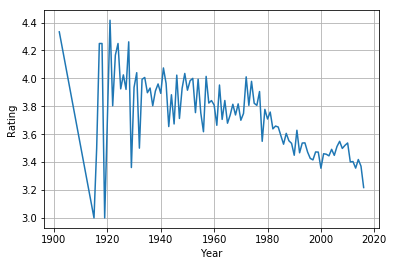

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(rating_by_year)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid()
plt.show()


### Вывод:
##### Средний рейтинг фильмов с течением времени падает